# Homework 2

In [17]:
# use Julia's packae managing module to activate your current environment
using Pkg
Pkg.activate(".")
Pkg.resolve()
Pkg.update()
Pkg.instantiate()

  Activating project at `~/julia/vision`
  No Changes to `~/julia/vision/Project.toml`
  No Changes to `~/julia/vision/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/julia/vision/Project.toml`
  No Changes to `~/julia/vision/Manifest.toml`


Objective:

- investigate normalization
- model LGN as a center-surround filter with normalization
- look at effect in image processing

In [18]:
# telling Julia to load modules that we need for our code, which have been specified as dependencies for our current package
using Images, ImageFiltering
using TestImages
using Statistics
using Plots

In [19]:
# load the additional Utils module provided with the exercise
include("material/utils.jl")
using .Utils

Hello!

## LGN Model

- Model from Bonin, Mante & Carandini (2005), Journal of Neuroscience 25(47), 10844-10856.
- Hints: 
    - Check the paper for model parameters
    - Check the provided `utils.jl` for additional, helpful implementations
    - Dependent on your implementation, Julia's `mapwindow` function might be helpful for computing the summation part of `c_local`, or `imfilter` might be easier

In [20]:
# ...to be implemented:
function lgn(stimulus; standard_cell, ppd)
    
    frf = Utils.customDoG(standard_cell[:σᶜᵉⁿ]*ppd, standard_cell[:σˢʳᵈ]*ppd, standard_cell[:kˢʳᵈ])
    
    L = imfilter(stimulus, frf)

    
    H = Utils.customDoG(standard_cell[:σᵘ]*ppd, standard_cell[:σᵈ]*ppd, standard_cell[:kᵈ])
    Gsf = Kernel.gaussian(standard_cell[:σˢᶠ]*ppd)

    clocal = imfilter(stimulus, H) .^ 2
    clocal = imfilter(clocal, Gsf)

    V = standard_cell[:vᵐᵃˣ] .* L ./ (standard_cell[:c⁵⁰] .+ clocal)

    R = max.(V .- standard_cell[:v⁰], 0.0)

    
    R = Utils.normalize(R)

    return R

end


lgn (generic function with 1 method)

- Use of keyword arguments to make model easily parametrizable
- Large number of keyword arguments can be passed with a dictionary

In [21]:
# ...to be implemented: 
standard_cell = Dict(
    :vᵐᵃˣ => 212,
    :v⁰ => -7.8,
    :σᶜᵉⁿ => 0.6,
    :σˢʳᵈ => 2.0,
    :kˢʳᵈ => 0.8,
    :σˢᶠ => 2.5,
    :c⁵⁰ => 0.3,
    :σᵘ => 0.4,
    :σᵈ => 1.8,
    :kᵈ => 0.4
)

Dict{Symbol, Real} with 10 entries:
  :σᶜᵉⁿ => 0.6
  :kˢʳᵈ => 0.8
  :σᵘ   => 0.4
  :σˢᶠ  => 2.5
  :c⁵⁰  => 0.3
  :kᵈ   => 0.4
  :vᵐᵃˣ => 212
  :v⁰   => -7.8
  :σˢʳᵈ => 2.0
  :σᵈ   => 1.8

## Testing the model

- As in the original paper, test the model with sine gratings
- Use `stimulus()` function from `utils.jl` to generate stimuli
- Original paper used moving stimuli; we will just use maximum response over stationary stimulus

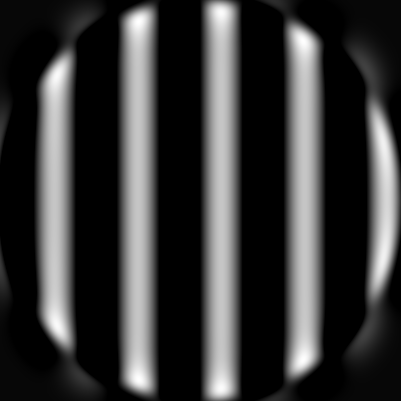

In [22]:
# ...to be implemented (optional): visualize the stimulus
stimulus = Utils.stimulus()

response = lgn(stimulus; 
               standard_cell=standard_cell,
               ppd=ppd)

grayscale_img = Gray.(response)



- First experiment: measure response for various contrast levels
- Observation in paper: saturating (sublinear) curve

In [23]:
# ...to be implemented: 

- Second experiment: measure response for increasing stimulus sizes
- Observation in paper: steep increase to optimal stimulus, then smaller decrease

In [24]:
# ...to be implemented: 

## Using the LGN model for image processing

In [25]:
# ...to be implemented: Load the testimage `lake`

- First experiment: **LGN model** with normalization

In [26]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

- Second experiment: use the **custom DoG-filter** from the model

In [27]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

- Third experiment: **standard DoG** center-surround filter

In [28]:
# ...to be implemented: 

*...to be replaced:* What's your observation?

*...to be replaced:* What are the differences between the filters?